In [1]:
setwd('../')
getwd()

[1] "/Users/tnowacki/github/strategicvoting"

In [2]:
# Load dependencies
library(tidyverse)
library(rio)
library(gtools)
library(pivotprobs)

# Load data
load("output/files/1/85_winners_tbl.Rdata")
load("output/files/1/85_winners.Rdata")
load("output/big_list_2.RData")
vap <- read.csv("data/case_vap.csv", sep = "") # voting age pop.

# Load scripts and templates
source("code/utils/sv_theme_template.R")
source("code/utils/new_sv_iter.R")
source("code/prep_cses.R") # data prep


-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Registering fonts with R

Loading required package: viridisLite

Joining, by = "cntry"


big_list_na_omit prepared. 


In [11]:
# 
s_param <- c("85")
lambda_param <- c("1")
 
load("output/files/1/85_vvec.Rdata")

In [33]:
str(vvecdf)

List of 160
 $ AUS_2013:List of 4
  ..$ rcvvec : tibble [250 x 6] (S3: tbl_df/tbl/data.frame)
  .. ..$ abc: num [1:250] 0.303 0.296 0.297 0.297 0.297 ...
  .. ..$ acb: num [1:250] 0.188 0.179 0.175 0.172 0.17 ...
  .. ..$ bac: num [1:250] 0.11 0.11 0.11 0.11 0.11 ...
  .. ..$ bca: num [1:250] 0.222 0.229 0.233 0.236 0.238 ...
  .. ..$ cab: num [1:250] 0.034 0.0505 0.0539 0.0564 0.0581 ...
  .. ..$ cba: num [1:250] 0.142 0.136 0.132 0.129 0.127 ...
  ..$ plurvec: tibble [250 x 3] (S3: tbl_df/tbl/data.frame)
  .. ..$ a: num [1:250] 0.492 0.493 0.495 0.496 0.498 ...
  .. ..$ b: num [1:250] 0.332 0.339 0.346 0.352 0.358 ...
  .. ..$ c: num [1:250] 0.176 0.168 0.159 0.151 0.144 ...
  ..$ rcvbr  : tibble [250 x 6] (S3: tbl_df/tbl/data.frame)
  .. ..$ ABC: num [1:250] 0.161 0.302 0.302 0.302 0.302 ...
  .. ..$ ACB: num [1:250] 0 0.104 0.119 0.132 0.14 ...
  .. ..$ BAC: num [1:250] 0.11 0.111 0.111 0.111 0.111 ...
  .. ..$ BCA: num [1:250] 0.344 0.313 0.295 0.274 0.259 ...
  .. ..$ CAB: num [1

name,value
<chr>,<dbl>
c_share_60,8.558821e-03
c_share_250,5.010706e-07
br_share_60,5.399568e-04
br_share_250,0.000000e+00
c_share_60,8.611177e-03
c_share_250,5.041358e-07


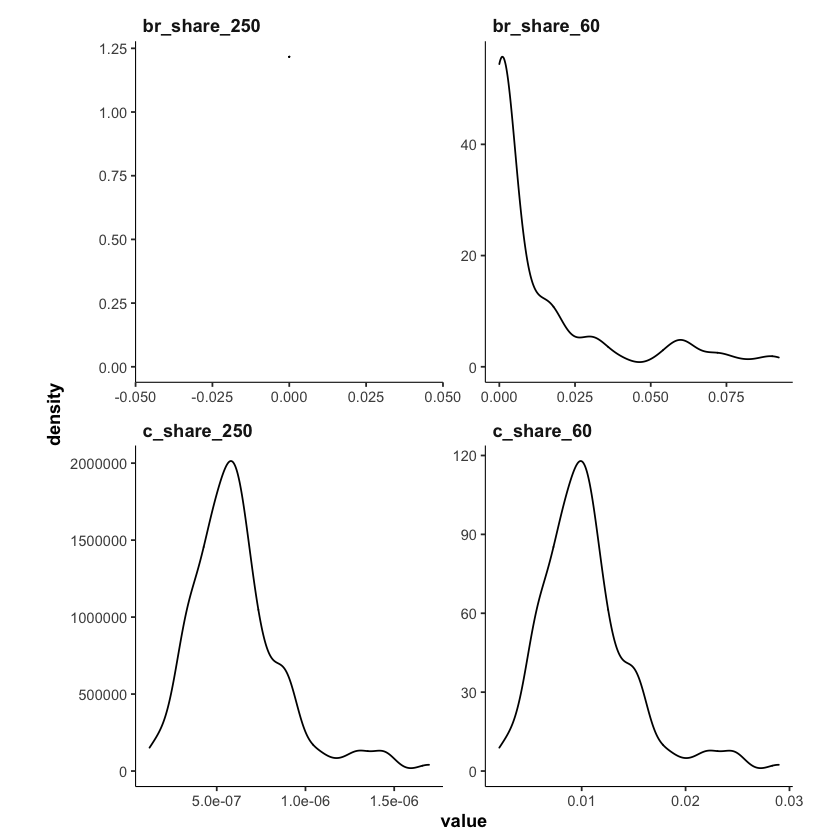

In [42]:
c_share_60 <- map_dbl(vvecdf, ~ .x$plurvec$c[60])
c_share_250 <- map_dbl(vvecdf, ~ .x$plurvec$c[250])
br_share_60 <- map_dbl(vvecdf, ~ .x$plurbr$C[2])
br_share_250 <- map_dbl(vvecdf, ~ .x$plurbr$C[250])

hist_data <- data.frame(
  c_share_60, 
  c_share_250,
  br_share_60,
  br_share_250
) %>%
  pivot_longer(c_share_60:br_share_250)

head(hist_data)

ggplot(hist_data %>% filter(value < 0.1), aes(x = value)) +
  geom_density() +
  facet_wrap(. ~ name, scales = "free") +
  theme_tn()

In [48]:
toy_u <- data.frame(
  A = c(1.999, 2.001),
  B = c(2.001, 1.999),
  C = c(8, 8)
)

sv(
  U = toy_u,
  s = 85,
  v.vec = c(0.4, 0.4, 0.2),
  rule = "plurality"
)


ERROR: Error in election_event_probs(., method = "ev", alpha = (v.vec * s)): could not find function "election_event_probs"
